In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores, get_norm_score,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer,
                                         plot_combined_scores)

In [6]:
num_bo_iters = 25
num_layers = 25

In [20]:
experiment_dir = "../data/experiments/roi/more_layers/pls_pca_50_simclr_r50_mean"
meta_log, hyper_log = load_result_logs(experiment_dir)

In [21]:
hyper_log.best_bo_score.max()

0.40116772055625916

# Bayesian Optimization Procedure Across Network Feature Layers

../utils/visualize_experiments.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eval_id = hyper_log.hyper_log[hyper_log.hyper_log.subject_id == subject_id][hyper_log.hyper_log.roi_type == roi_type].run_id.iloc[0]


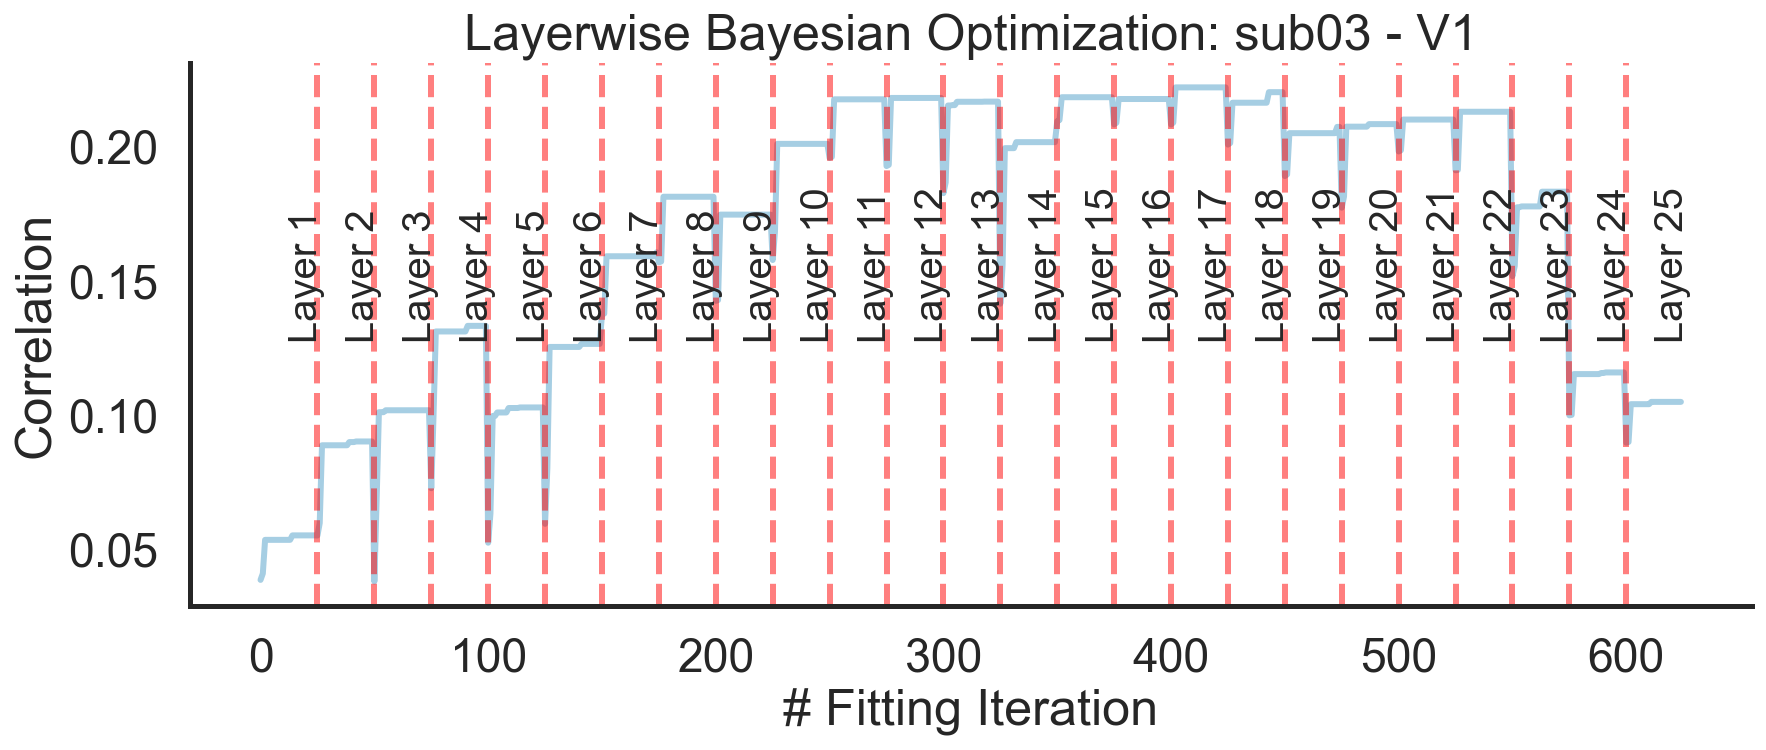

In [22]:
plot_bo_scores(meta_log, hyper_log, subject_id="sub03", roi_type="V1", num_bo_per_layer=num_bo_iters, num_layers=num_layers)

# Performance Across Subjects and ROIs

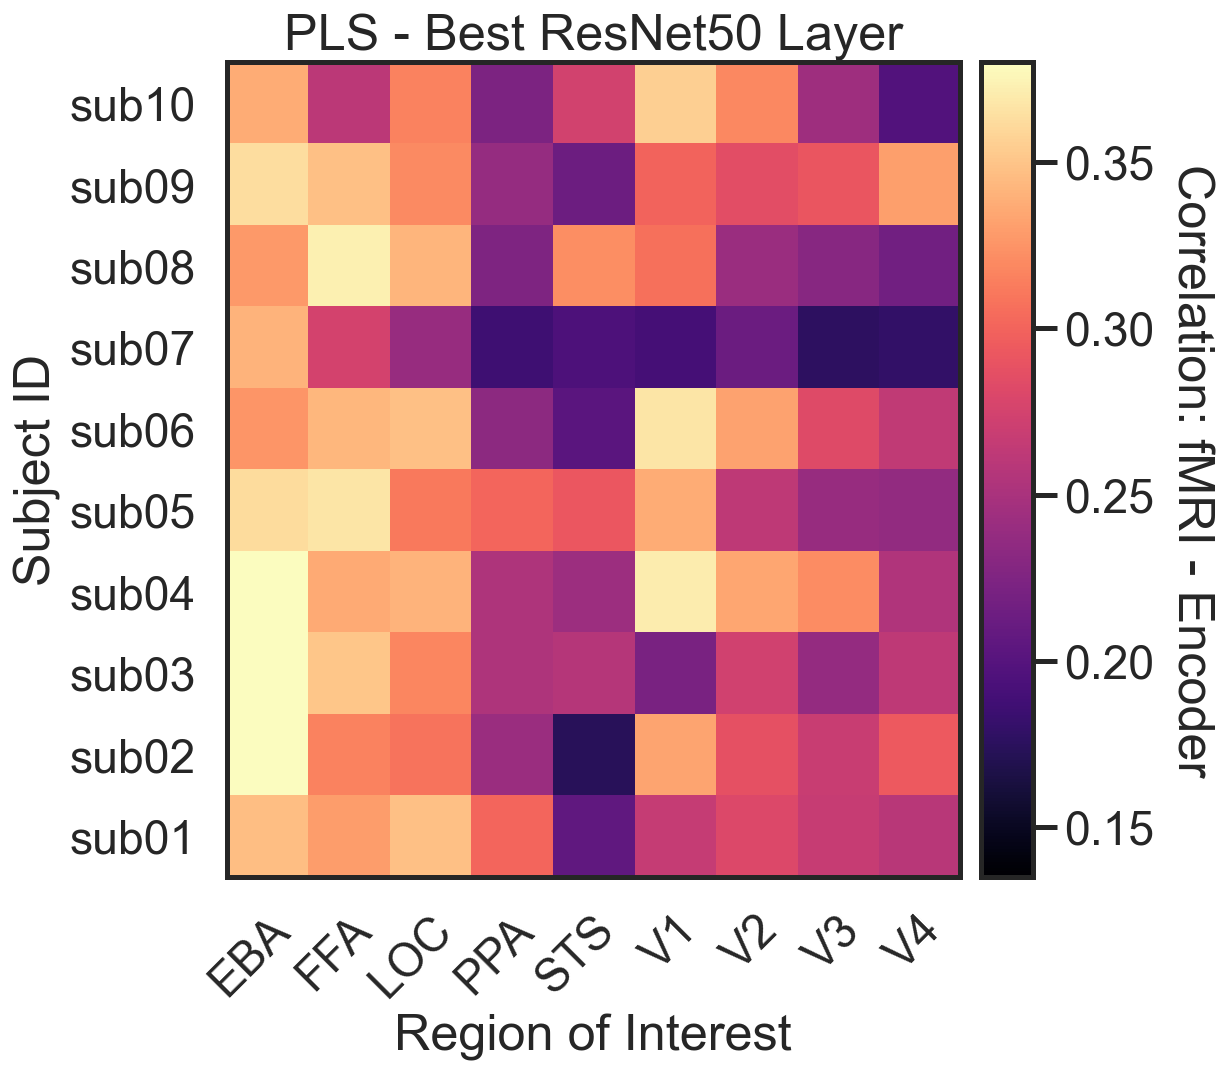

In [23]:
plot_roi_subject_grid(hyper_log, title="PLS - Best ResNet50 Layer", max_heat=0.38)

[0.36260261 0.33329116 0.32124991 0.25723294 0.23550993 0.31068805
 0.28537365 0.2584525  0.25600559]


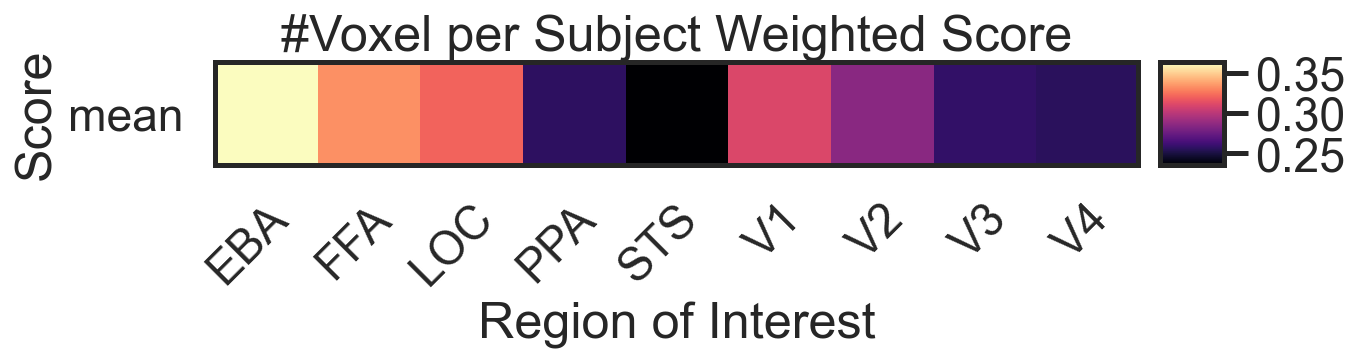

In [25]:
get_norm_score(hyper_log, plot=True)

# Performance Per Layer

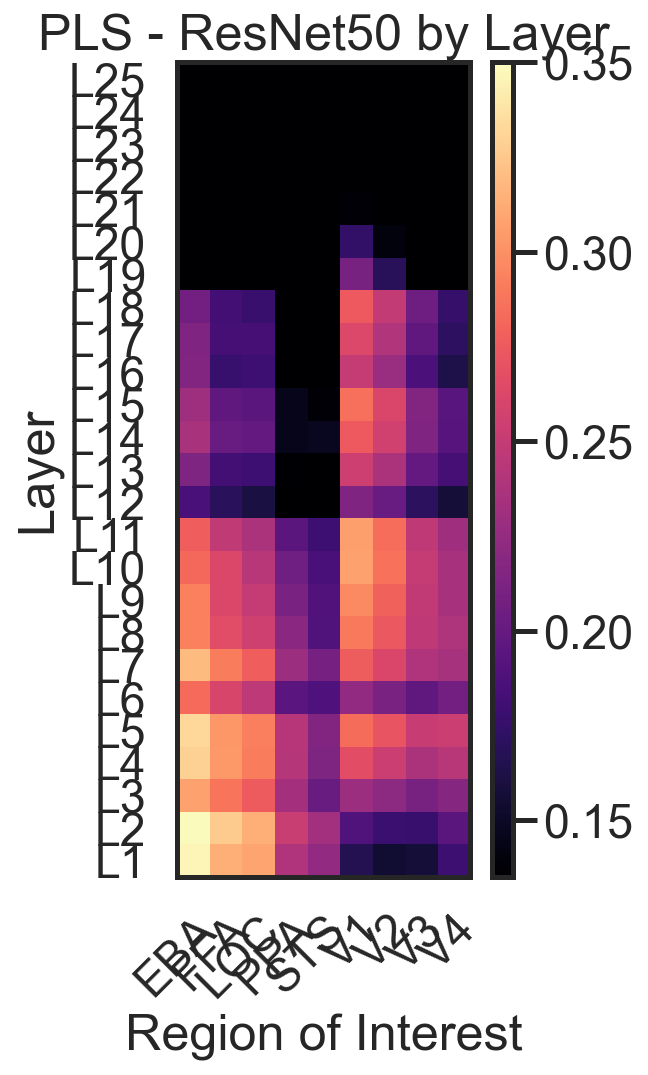

In [16]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=25, num_layers=25, title="PLS - ResNet50 by Layer")

# Mean & Median Features

[0.31068805 0.28537365 0.2584525  0.25600559 0.32124991 0.36260261
 0.33329116 0.23550993 0.25723294]
[0.30905665 0.28727043 0.25682457 0.25367014 0.31528584 0.35078926
 0.32788188 0.23318768 0.25327828]


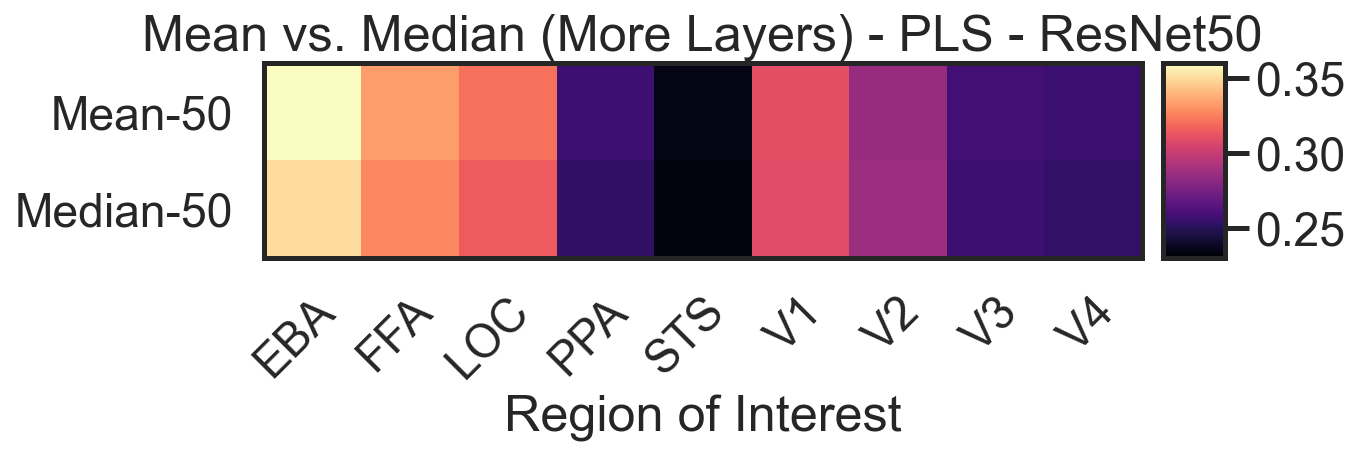

In [27]:
meta_log_50_mean, hyper_log_50_mean = load_result_logs("../data/experiments/roi/more_layers/pls_pca_50_simclr_r50_mean")
meta_log_50_median, hyper_log_50_median = load_result_logs("../data/experiments/roi/more_layers/pls_pca_50_simclr_r50_median")

mean_50 = get_norm_score(hyper_log_50_mean)
median_50 = get_norm_score(hyper_log_50_median)

scores = [mean_50, median_50]
range_y = ['Mean-50', "Median-50"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Mean vs. Median (More Layers) - PLS - ResNet50"
ylabel = None #"Compression Technique"
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.23, max_heat=0.36)

# Feature Compression Comparison

In [ ]:
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_pca_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_pca_250_resnet50_bo_25")

pca_50 = get_norm_score(hyper_log_50)
pca_100 = get_norm_score(hyper_log_100)
pca_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_umap_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_umap_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_umap_250_resnet50_bo_25")

umap_50 = get_norm_score(hyper_log_50)
umap_100 = get_norm_score(hyper_log_100)
umap_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_mds_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_mds_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_mds_250_resnet50_bo_25")

mds_50 = get_norm_score(hyper_log_50)
mds_100 = get_norm_score(hyper_log_100)
mds_250 = get_norm_score(hyper_log_250)

print(30*"=")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/compression/pls_autoencoder_250_resnet50_bo_25")

autoencoder_50 = get_norm_score(hyper_log_50)
autoencoder_100 = get_norm_score(hyper_log_100)
autoencoder_250 = get_norm_score(hyper_log_250)

In [ ]:
scores = [autoencoder_100, autoencoder_250,
          mds_100, mds_250,
          umap_100, umap_250,
          pca_50, pca_100, pca_250]
range_y = ['L-AE-100', "L-AE-250",
           "MDS-100", "MDS-250",
           "UMAP-100", "UMAP-250",
           "PCA-50", "PCA-100", "PCA-250"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Compression - PLS - ResNet50"
ylabel = None #"Compression Technique"
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# Architecture Comparison

In [ ]:
meta_log_alex, hyper_log_alex = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_alexnet_bo_25")
meta_log_vgg, hyper_log_vgg = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_vgg_bo_25")
meta_log_r18, hyper_log_r18 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet18_bo_25")
meta_log_r34, hyper_log_r34 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet34_bo_25")
meta_log_r50, hyper_log_r50 = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_r101, hyper_log_r101 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet101_bo_25")
meta_log_r152, hyper_log_r152 = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet152_bo_25")
meta_log_eff, hyper_log_eff = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_efficientnet_b3_bo_25")
meta_log_rnext, hyper_log_rnext = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnext50_32x4d_bo_25")


alexnet = get_norm_score(hyper_log_alex)
vgg = get_norm_score(hyper_log_vgg)
r18 = get_norm_score(hyper_log_r18)
r34 = get_norm_score(hyper_log_r34)
r50 = get_norm_score(hyper_log_r50)
r101 = get_norm_score(hyper_log_r101)
r152 = get_norm_score(hyper_log_r152)
enet = get_norm_score(hyper_log_eff)
rnext = get_norm_score(hyper_log_rnext)

In [ ]:
scores = [alexnet, vgg,
          r18, r34, r50, r101, r152,
          enet, rnext]
range_y = ['Alexnet', "VGG-19",
           "ResNet-18", "ResNet-34",
           "ResNet-50", "ResNet-101", "ResNet-152",
           "EfficientNet", "ResNeXt-50"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Architectures - PLS - PCA-50"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# Encoding Model Comparison

In [ ]:
meta_log_ols, hyper_log_ols = load_result_logs("../data/experiments/roi/encoders/ols_pca_50_resnet152_bo_25")
meta_log_elastic, hyper_log_elastic = load_result_logs("../data/experiments/roi/encoders/elastic_pca_50_resnet152_bo_25")
meta_log_mlp, hyper_log_mlp = load_result_logs("../data/experiments/roi/encoders/mlp_pca_50_resnet152_bo_25")
meta_log_pls, hyper_log_pls = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet152_bo_25")
meta_log_cca, hyper_log_cca = load_result_logs("../data/experiments/roi/encoders/cca_pca_50_resnet152_bo_25")
meta_log_cpls, hyper_log_cpls = load_result_logs("../data/experiments/roi/encoders/cpls_pca_50_resnet152_bo_25")
meta_log_omp, hyper_log_omp = load_result_logs("../data/experiments/roi/encoders/omp_pca_50_resnet152_bo_25")


ols = get_norm_score(hyper_log_ols)
elastic = get_norm_score(hyper_log_elastic)
mlp = get_norm_score(hyper_log_mlp)
pls = get_norm_score(hyper_log_pls)
cca = get_norm_score(hyper_log_cca)
cpls = get_norm_score(hyper_log_cpls)
cpls = get_norm_score(hyper_log_cpls)
omp = get_norm_score(hyper_log_cpls)

In [ ]:
scores = [ols, elastic, mlp, pls, cca, cpls, omp]
range_y = ['OLS', "Elastic", "MLP", "PLS", "CCA", "C-PLS", "OMP"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Encoders - PCA-50 - ResNet152"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# BOLD Filtering of Network Activations

In [ ]:
meta_log_r50_mean, hyper_log_r50_mean = load_result_logs("../data/experiments/roi/compression/pls_pca_50_resnet50_bo_25")
meta_log_r50_pca, hyper_log_r50_pca = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_1d_pca_bo_25")
meta_log_r50_bold_1, hyper_log_r50_bold_1 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_bold_1_bo_25")
meta_log_r50_bold_2, hyper_log_r50_bold_2 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_bold_2_bo_25")
meta_log_r50_bold_3, hyper_log_r50_bold_3 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet50_bold_3_bo_25")

meta_log_r152_mean, hyper_log_r152_mean = load_result_logs("../data/experiments/roi/architectures/pls_pca_50_resnet152_bo_25")
meta_log_r152_pca, hyper_log_r152_pca = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_1d_pca_bo_25")
meta_log_r152_bold_1, hyper_log_r152_bold_1 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_bold_1_bo_25")
meta_log_r152_bold_2, hyper_log_r152_bold_2 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_bold_2_bo_25")
meta_log_r152_bold_3, hyper_log_r152_bold_3 = load_result_logs("../data/experiments/roi/filters/pls_pca_50_resnet152_bold_3_bo_25")


r50_mean = get_norm_score(hyper_log_r50_mean)
r50_pca = get_norm_score(hyper_log_r50_pca)
r50_bold_1 = get_norm_score(hyper_log_r50_bold_1)
r50_bold_2 = get_norm_score(hyper_log_r50_bold_2)
r50_bold_3 = get_norm_score(hyper_log_r50_bold_3)
print(20*"=")
r152_mean = get_norm_score(hyper_log_r152_mean)
r152_pca = get_norm_score(hyper_log_r152_pca)
r152_bold_1 = get_norm_score(hyper_log_r152_bold_1)
r152_bold_2 = get_norm_score(hyper_log_r152_bold_2)
r152_bold_3 = get_norm_score(hyper_log_r152_bold_3)


In [ ]:
scores = [r50_mean, r50_pca, r50_bold_1, r50_bold_2, r50_bold_3,
          r152_mean, r152_pca, r152_bold_1, r152_bold_2, r152_bold_3]
range_y = ['50-Mean', "50-PCA", "50-HRF-1", "50-HRF-2", "50-HRF-3",
           '152-Mean', "152-PCA", "152-HRF-1", "152-HRF-2", "152-HRF-3"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "PLS - PCA-50 - Temp. Aggregation"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.135, max_heat=0.35)

# Vone Networks

In [ ]:
meta_log_50_vone_r50, hyper_log_50_vone_r50 = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_resnet50_bo_25")
meta_log_50_vone_r50_at, hyper_log_50_vone_r50_at = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_resnet50_at_bo_25")
meta_log_50_vone_r50_ns, hyper_log_50_vone_r50_ns = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_resnet50_ns_bo_25")
meta_log_50_vone_cornets, hyper_log_50_vone_cornets = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_50_vone_cornets_bo_25")


meta_log_100_vone_r50, hyper_log_100_vone_r50 = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_resnet50_bo_25")
meta_log_100_vone_r50_at, hyper_log_100_vone_r50_at = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_resnet50_at_bo_25")
meta_log_100_vone_r50_ns, hyper_log_100_vone_r50_ns = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_resnet50_ns_bo_25")
meta_log_100_vone_cornets, hyper_log_100_vone_cornets = load_result_logs("../data/experiments/roi/vone_nets/pls_pca_100_vone_cornets_bo_25")


pca_50_vone_r50 = get_norm_score(hyper_log_50_vone_r50)
pca_50_vone_r50_at = get_norm_score(hyper_log_50_vone_r50_at)
pca_50_vone_r50_ns = get_norm_score(hyper_log_50_vone_r50_ns)
pca_50_vone_cornets = get_norm_score(hyper_log_50_vone_cornets)

print(20*"=")
pca_100_vone_r50 = get_norm_score(hyper_log_100_vone_r50)
pca_100_vone_r50_at = get_norm_score(hyper_log_100_vone_r50_at)
pca_100_vone_r50_ns = get_norm_score(hyper_log_100_vone_r50_ns)
pca_100_vone_cornets = get_norm_score(hyper_log_100_vone_cornets)


In [ ]:
scores = [pca_50_vone_r50, pca_50_vone_r50_at, pca_50_vone_r50_ns, pca_50_vone_cornets,
          pca_100_vone_r50, pca_100_vone_r50_at, pca_100_vone_r50_ns, pca_100_vone_cornets]
range_y = ['VOne-R50-P50', "VOne-R50-AT-P50", "VOne-R50-NS-P50", "VOne-Cornets-P50",
           'VOne-R50-P100', "VOne-R50-AT-P100", "VOne-R50-NS-P100", "VOne-Cornets-P100",][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "PLS - VOneNetworks"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.135, max_heat=0.35)

# SimCLR-v2 Networks

In [ ]:
meta_log_50_r50_1, hyper_log_50_r50_1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r50_1_bo_25")
meta_log_50_r50_2, hyper_log_50_r50_2 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r50_2_bo_25")

meta_log_100_r50_1, hyper_log_100_r50_1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_100_simclr_r50_1_bo_25")
meta_log_100_r50_2, hyper_log_100_r50_2 = load_result_logs("../data/experiments/roi/simclr/pls_pca_100_simclr_r50_2_bo_25")

meta_log_250_r50_1, hyper_log_250_r50_1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_250_simclr_r50_1_bo_25")
meta_log_250_r50_2, hyper_log_250_r50_2 = load_result_logs("../data/experiments/roi/simclr/pls_pca_250_simclr_r50_2_bo_25")


meta_log_50_r101_1x_sk0, hyper_log_50_r101_1x_sk0 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r101_1x_sk0_bo_25")
meta_log_50_r101_1x_sk1, hyper_log_50_r101_1x_sk1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r101_1x_sk1_bo_25")
meta_log_50_r101_2x_sk0, hyper_log_50_r101_2x_sk0 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r101_2x_sk0_1_bo_25")
meta_log_50_r101_2x_sk1, hyper_log_50_r101_2x_sk1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r101_2x_sk1_bo_25")

meta_log_50_r152_2x_sk1, hyper_log_50_r152_2x_sk1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r152_2x_sk1_bo_25")
meta_log_50_r152_3x_sk1, hyper_log_50_r152_3x_sk1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r152_3x_sk1_bo_25")
meta_log_100_r152_2x_sk1, hyper_log_100_r152_2x_sk1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_100_simclr_r152_2x_sk1_bo_25")
meta_log_100_r152_3x_sk1, hyper_log_100_r152_3x_sk1 = load_result_logs("../data/experiments/roi/simclr/pls_pca_100_simclr_r152_3x_sk1_bo_25")


pca_50_simclr_r50_1 = get_norm_score(hyper_log_50_r50_1)
pca_50_simclr_r50_2 = get_norm_score(hyper_log_50_r50_2)
pca_50_simclr_r152_3x_sk1 = get_norm_score(hyper_log_50_r152_3x_sk1)

pca_100_simclr_r50_1 = get_norm_score(hyper_log_100_r50_1)
pca_100_simclr_r50_2 = get_norm_score(hyper_log_100_r50_2)
pca_100_simclr_r152_3x_sk1 = get_norm_score(hyper_log_100_r152_3x_sk1)
# pca_250_simclr_r50_1 = get_norm_score(hyper_log_250_r50_1)
# pca_250_simclr_r50_2 = get_norm_score(hyper_log_250_r50_2)

# pca_50_simclr_r101_1x_sk0 = get_norm_score(hyper_log_50_r101_1x_sk0)
# pca_50_simclr_r101_1x_sk1 = get_norm_score(hyper_log_50_r101_1x_sk1)
# pca_50_simclr_r101_2x_sk0 = get_norm_score(hyper_log_50_r101_2x_sk0)
# pca_50_simclr_r101_2x_sk1 = get_norm_score(hyper_log_50_r101_2x_sk1)

#pca_50_simclr_r152_2x_sk1 = get_norm_score(hyper_log_50_r152_2x_sk1)
#pca_100_simclr_r152_2x_sk1 = get_norm_score(hyper_log_100_r152_2x_sk1)

In [ ]:
scores = [pca_50_simclr_r50_1, pca_50_simclr_r50_2, pca_50_simclr_r152_3x_sk1,
          pca_100_simclr_r50_1, pca_100_simclr_r50_2, pca_100_simclr_r152_3x_sk1]
range_y = ['R50-1-P50', "R50-2-P50", "R152-1-P50",
           "R50-1-P100", "R50-2-P100", "R152-1-100"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "PLS - SimCLR-v2 ResNets"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.18, max_heat=0.36)

# Influence of Sampling Rates

In [ ]:
meta_log_50_r50_1, hyper_log_50_r50_1 = load_result_logs("../data/experiments/roi/sampling_rates/pls_pca_50_simclr_r50_2_sr_1")
meta_log_50_r50_2, hyper_log_50_r50_2 = load_result_logs("../data/experiments/roi/sampling_rates/pls_pca_50_simclr_r50_2_sr_2")
meta_log_50_r50_3, hyper_log_50_r50_3 = load_result_logs("../data/experiments/roi/sampling_rates/pls_pca_50_simclr_r50_2_sr_3")
meta_log_50_r50_4, hyper_log_50_r50_4 = load_result_logs("../data/experiments/roi/simclr/pls_pca_50_simclr_r50_2_bo_25")

pca_50_simclr_r50_1 = get_norm_score(hyper_log_50_r50_1)
pca_50_simclr_r50_2 = get_norm_score(hyper_log_50_r50_2)
pca_50_simclr_r50_3 = get_norm_score(hyper_log_50_r50_3)
pca_50_simclr_r50_4 = get_norm_score(hyper_log_50_r50_4)

In [ ]:
scores = [pca_50_simclr_r50_1, pca_50_simclr_r50_2, pca_50_simclr_r50_3, pca_50_simclr_r50_4]
range_y = ["S1", "S2", "S3", "S4"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "PLS - SimCLR-v2 Sampling Rates"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.23, max_heat=0.36)

# Best Layer Per ROI/Subject

In [ ]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")

# ImageNet Validation Scores

In [ ]:
import pandas as pd

df = pd.read_csv("../data/imagenet_val_scores.csv", index_col=0)
x_labels = df['model_type'].tolist()[::-1]

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(np.arange(df.shape[0]), df["top1"][::-1])
ax.set_yticks(np.arange(df.shape[0]))
ax.set_yticklabels(x_labels, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Validation Accuracy")
ax.set_title("ImageNet Validation Accuracy", fontsize=30)
ax.set_xlim(0.55, 0.81)

In [ ]:
df